In [7]:
import napari
from qtpy.QtWidgets import QSlider, QVBoxLayout, QWidget, QLabel
from qtpy.QtCore import Qt
from skimage.feature import peak_local_max

import sys
import os
import importlib

cur=os.getcwd()
paths = [cur := os.path.dirname(cur) for _ in range(3)]
sys.path.insert(0, paths[0])

from Helpers import loadData


In [ ]:
from magicgui import magicgui
import datetime
import pathlib

In [38]:
import napari
import numpy as np
from magicgui import magicgui
from napari.layers import Image

@magicgui(call_button='Add Image')
def my_widget(ny: int=64, nx: int=64) -> Image:
  return Image(np.random.rand(ny, nx), name='My Image')

viewer = napari.Viewer()
viewer.window.add_dock_widget(my_widget, area='right')
my_widget()

<Image layer 'My Image' at 0x146c6e5af20>

(array([[1.58334240e+02, 4.90435450e+01],
        [3.16809110e+02, 1.42079059e+02],
        [3.41416832e+02, 2.90216454e+02],
        [3.26101417e+02, 4.37731656e+02],
        [3.44005885e+01, 2.84393062e+02],
        [3.22163817e+02, 4.21879691e+02],
        [3.42765670e+02, 6.24152202e+01],
        [1.72810175e+02, 1.16078054e+02],
        [4.09584655e+02, 7.25029932e+01],
        [4.36202335e+02, 4.41395812e+02],
        [4.85639907e+02, 4.55577649e+02],
        [3.50389522e+02, 3.79025054e+02],
        [1.51020119e+02, 2.57496850e+02],
        [1.55106872e+02, 4.62758277e+02],
        [3.16705804e+02, 1.67658402e+02],
        [1.99034379e+01, 3.63276210e+02],
        [3.18315554e+02, 3.02197413e+02],
        [2.11831753e+02, 4.82497319e+02],
        [4.34702272e+02, 3.10668916e+02],
        [4.55848058e+02, 6.46239922e+01],
        [4.34658487e+02, 2.90417343e+01],
        [1.22889145e+02, 1.67297943e+02],
        [3.30260233e+01, 3.58001066e+02],
        [1.64614388e+02, 3.5846693

In [37]:
import napari
import numpy as np
from magicgui import magicgui
from napari.layers import Image

@magicgui(image={'label': 'Pick an Image'})
def my_widget(image: Image):
    ...

viewer = napari.Viewer()
viewer.add_image(np.random.rand(64, 64), name="My Image")
viewer.add_image(np.random.rand(64, 64), name="My Image2")
viewer.window.add_dock_widget(my_widget)

#viewer, _ = napari.imshow(np.random.rand(64, 64), name="My Image")
#viewer.window.add_dock_widget(my_widget)

In [8]:
print(paths)

['c:\\Users\\Lab User\\Desktop\\temp1\\Granular-Compression', 'c:\\Users\\Lab User\\Desktop\\temp1', 'c:\\Users\\Lab User\\Desktop']


In [10]:
data = loadData(location=os.path.join(paths[0],'Data'), 
                fileName='convMap_17.hdf5')
peaks = peak_local_max(data)

In [ ]:
@magicgui(call_button='Make Points', n_points={'max': 200})
def make_points(n_points=40) -> napari.types.LayerDataTuple:
  data = 500 * np.random.rand(n_points, 2)
  # 'My Points' is the name of an existing layer
  return (data, {'name': 'My Points'}, 'points')

viewer = napari.Viewer()
viewer.window.add_dock_widget(make_points)
# calling this multiple times will just update 'My Points'
make_points()
make_points.n_points.value = 80
make_points()
make_points.n_points.value = 120
make_points()

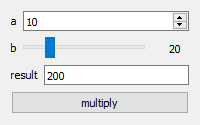

In [43]:
from magicgui import widgets

a = widgets.SpinBox(value=10, label="a")
b = widgets.Slider(value=20, min=0, max=100, label="b")
result = widgets.LineEdit(value=a.value * b.value, label="result")
button = widgets.PushButton(text="multiply")

@button.clicked.connect
def on_button_click():
    result.value = a.value * b.value

container = widgets.Container(widgets=[a, b, result, button])
container.show()

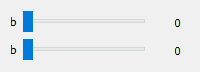

In [51]:
dim = data.shape
low  = widgets.Slider(value=0, min=0, max=dim[-1], label="b")
high = widgets.Slider(value=0, min=0, max=dim[-1], label="b")
container = widgets.Container(widgets=[low,high])
container.show()

In [ ]:
@magicgui(call_button='Make Points')
def adjust_slab() -> napari.types.LayerDataTuple:
    dim = data.shape
    low  = widgets.Slider(value=0, min=0, max=dim[-1], label="b")
    high = widgets.Slider(value=0, min=0, max=dim[-1], label="b")
    slabData = data[:,:,low.value:high.value]
    # 'My Points' is the name of an existing layer
    return (slabData, {'name': 'My Points'}, 'points')

dim = data.shape
low  = widgets.Slider(value=0, min=0, max=dim[-1], label="b")
high = widgets.Slider(value=0, min=0, max=dim[-1], label="b")
container = widgets.Container(widgets=[low,high])

viewer = napari.Viewer()
viewer.add_image(data)
viewer.window.add_dock_widget(adjust_slab)
viewer.show()

In [ ]:
viewer = napari.Viewer()
viewer.add_image(data, colormap='bop blue')
viewer.add_points(peaks, size=7, face_color='good_point', border_color='good_point')
viewer.add_wi
viewer.show()

c:\Users\Lab User\Desktop\temp1\Granular-Compression\.venv\lib\site-packages\napari\layers\utils\color_transformations.py:42: UserWarning: The provided colors parameter contained illegal values, resetting all colors values to white.
  warnings.warn(


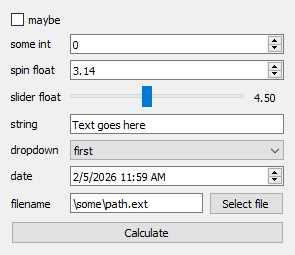

In [53]:
@magicgui(
    call_button="Calculate",
    slider_float={"widget_type": "FloatSlider", 'max': 10},
    dropdown={"choices": ['first', 'second', 'third']},
)
def widget_demo(
    maybe: bool,
    some_int: int,
    spin_float=3.14159,
    slider_float=4.5,
    string="Text goes here",
    dropdown='first',
    date=datetime.datetime.now(),
    filename=pathlib.Path('/some/path.ext')
):
    ...

widget_demo.show()